To create the desired time-series line chart using `matplotlib`, you can follow the steps outlined in the provided Python code. This code assumes that your DataFrame is named `df`.

```python
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Convert 'Date' to datetime format and sort the data
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot a time-series line chart of the 'Close' price over time
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='blue', label='Close Price')

# Format the x-axis to show quarterly labels
df['Quarter'] = df['Date'].dt.to_period('Q')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.DateFormatter('%Y Q%q'))

# Add a light grid background
plt.grid(which='major', linestyle='-', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.grid(which='minor', color='#D8D8D8', linestyle=':', linewidth=0.5)

# Set the title and

AttributeError: module 'matplotlib.pyplot' has no attribute 'DateFormatter'

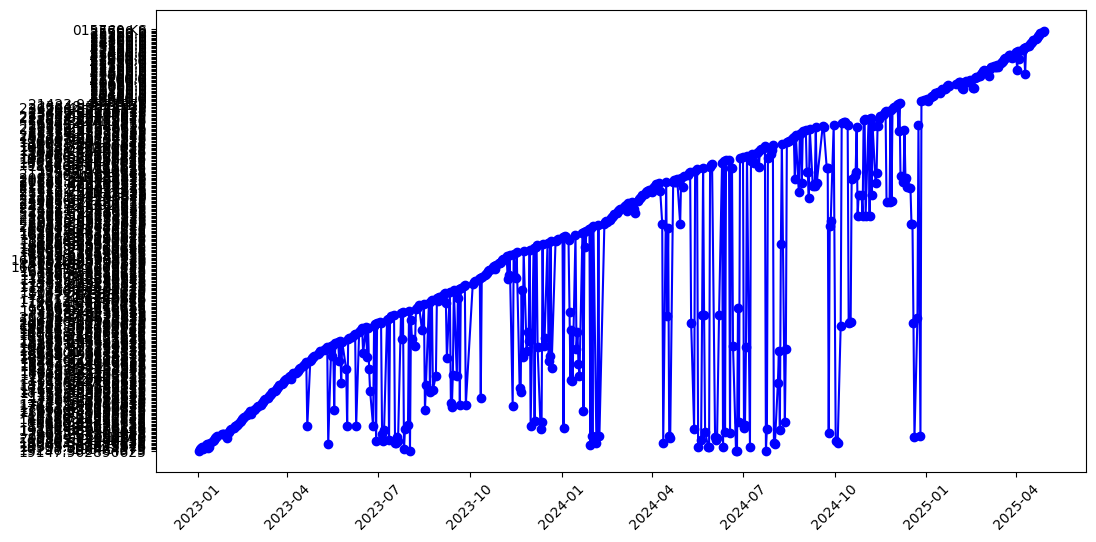

In [5]:
import pandas as pd
from openai import OpenAI
import os
import re
from dotenv import load_dotenv

# 환경 변수 로드
load_dotenv()

# Upstage 클라이언트 설정
client = OpenAI(
    api_key=os.getenv("UPSTAGE_API_KEY"),
    base_url="https://api.upstage.ai/v1"
)

# 주가 데이터 로딩
df = pd.read_csv("./data/stock_data.csv")

# 차트 스타일 포함 메시지
messages = [
    {
        "role": "system",
        "content": "You are a professional data visualization assistant. Generate elegant, readable matplotlib code to visualize time-series stock data."
    },
    {
        "role": "user",
        "content": f"""This is the head of a stock dataframe:

{df.head(20).to_string(index=False)}

The full DataFrame contains similar rows, and it has 'Date' and 'Close' columns.

Please write Python matplotlib code that:
- Converts 'Date' to datetime format and sorts the data.
- Plots a time-series line chart of the 'Close' price over time.
- Formats the x-axis to show quarterly labels (like 'Q1 2023').
- Adds a light grid background.
- Uses a solid blue line with circle markers.
- Sets the figure size to 12 by 6 inches.
- Adds the title 'Stock Price by Quarter'.
- Labels the x-axis as 'Quarter' and y-axis as 'Close Price'.
- Rotates x-axis labels 45 degrees.
- Shows the chart inline (e.g., plt.show()), do NOT save to file.
Use only English in labels and titles."""
    }
]

# 호출
response = client.chat.completions.create(
    model="solar-pro",
    messages=messages
)

# 응답 출력
print(response.choices[0].message.content)

# 응답된 코드 실행
# LLM 응답 가져오기
content = response.choices[0].message.content

# 코드 블럭만 추출
match = re.search(r"```(?:python)?\n(.*?)```", content, re.DOTALL)
if match:
    code_to_run = match.group(1)
    exec(code_to_run)
else:
    print("❌ 코드 블럭을 찾을 수 없습니다.")

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 데이터 준비
df = pd.read_csv("./data/stock_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# 분기 컬럼 생성
df["Quarter"] = df["Date"].dt.to_period("Q").astype(str)

# 차트 그리기
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], marker="o", linestyle="-", color="blue", label="Close Price")

# x축 날짜 포맷 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 분기 단위 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y Q%q'))  # 분기 포맷

# 라벨 및 제목
plt.title("Stock Price by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Invalid format string

Error in callback <function _draw_all_if_interactive at 0x000001BED41ED620> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid format string

ValueError: Invalid format string

<Figure size 1200x600 with 1 Axes>

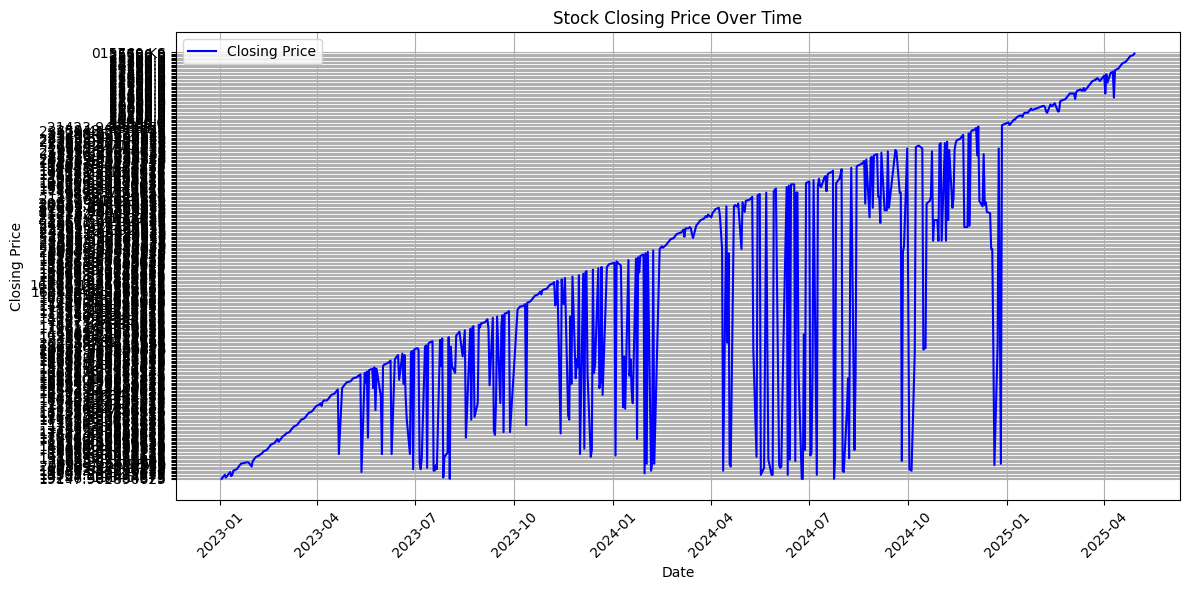

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 불러오기
df = pd.read_csv("./data/stock_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# 차트 스타일 적용
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], color='blue', linestyle='-', label='Closing Price')

# 제목, 라벨, 범례
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()

# X축 포맷 (월 단위로 자동 설정)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# 그리드 및 여백 조정
plt.grid(True)
plt.tight_layout()

# 출력
plt.show()


In [17]:
from openai import OpenAI
from pathlib import Path  # ✅ 이거 꼭 필요함!
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os

# Upstage 클라이언트 설정
client = OpenAI(
    api_key=os.getenv("UPSTAGE_API_KEY"),
    base_url="https://api.upstage.ai/v1"
)

def chart_stock_generator(command: str):
    """
    Upstage solar-pro를 사용하여 주식 차트를 그리고 './charts/stock_chart.png'에 저장합니다.
    """
    DATA_DIR = Path("./data")
    CHART_DIR = Path("./charts")
    CHART_DIR.mkdir(parents=True, exist_ok=True)

    stock_data = pd.read_csv(DATA_DIR / "stock_data.csv")
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    stock_data = stock_data.sort_values("Date")

    # LLM 입력용 데이터 요약
    preview = stock_data[["Date", "Close"]].head(20).to_string(index=False)

    messages = [
        {
            "role": "system",
            "content": "You are a professional data visualization assistant. Write matplotlib code to plot time-series stock prices in a clean and readable style."
        },
        {
            "role": "user",
            "content": f"""
This is the head of the stock_data dataframe:

{preview}

Please write Python matplotlib code that:
- Converts 'Date' to datetime and sorts the data
- Draws a line chart of 'Close' price over time
- X-axis shows date (month/year), rotated 45 degrees
- Y-axis shows price
- Adds grid
- Adds title 'Stock Closing Price Over Time'
- Adds label and legend 'Closing Price'
- Uses blue line
- Sets figsize (12, 6)
- Saves the chart as './charts/stock_chart.png'
Use only English labels.
"""
        }
    ]

    response = client.chat.completions.create(
        model="solar-pro",
        messages=messages
    )

    match = re.search(r"```(?:python)?\n(.*?)```", response.choices[0].message.content, re.DOTALL)
    if not match:
        raise ValueError("📉 차트 코드 추출 실패. 응답에 코드 블럭이 없음.")

    code = match.group(1)

    if "plt.savefig" not in code:
        code += "\nplt.savefig('./charts/stock_chart.png')"

    print("🧠 실행할 코드:\n", code)

    exec(code, {"stock_data": stock_data.copy(), "plt": plt, "mdates": mdates})


🧠 실행할 코드:
 import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock_data' is your DataFrame and it's already loaded

# Convert 'Date' to datetime and sort the data
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.sort_values('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], color='blue', marker='o', label='Closing Price')

# Formatting the plot
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Saving the plot
plt.savefig('./charts/stock_chart.png')

# Displaying the plot
plt.show()



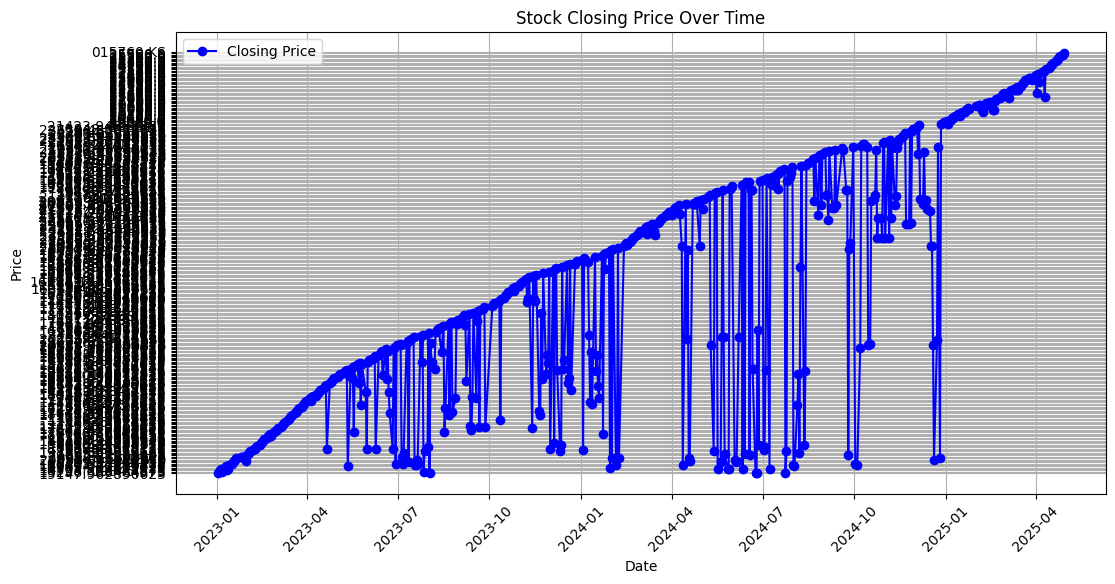

In [18]:
chart_stock_generator("draw stock chart")